In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint, choice, uniform

In [2]:
transactions_data = [
    (1003, 101, 3, '2023-01-04', 87.22, 1),
    (1005, 101, 4, '2023-02-05', 146.00, 1),
    (1010, 101, 1, '2023-03-05', 199.00, 1),
    (1004, 111, 7, '2023-01-07', 95.00, 1),
    (1008, 111, 3, '2023-02-26', 100.01, 0)
]

# Cтворення датафрейму
columns = ["trn_id", "customer_id", "location_id", "trn_date", "trn_income", "trn_success"]
df = pd.DataFrame(transactions_data, columns=columns)

# Перетворення колонки дата у відповідний формат
df['trn_date'] = pd.to_datetime(df['trn_date'])

# Вивід датафрейму
display(df)

,trn_id,customer_id,location_id,trn_date,trn_income,trn_success
0,1003,101,3,2023-01-04,87.22,1
1,1005,101,4,2023-02-05,146.00,1
2,1010,101,1,2023-03-05,199.00,1
3,1004,111,7,2023-01-07,95.00,1
4,1008,111,3,2023-02-26,100.01,0


### Щоб краще проілюструвати сегментацію клієнтів, згенерую синтетичний набір даних, подібний до вхідних даних.

In [4]:
# Задамо кількість рядків у датафреймі
num_rows = 200

# Генеруємо унікальні customer_id з кроком 10 
customer_ids = np.arange(101,  101 + 50)

# Список можливих location_id
location_ids = [1, 2, 3, 4, 5, 6, 7]

# Створення даних для датафрейму
data = {
    'trn_id': range(1001, 1001 + num_rows),  # Унікальні ID транзакцій
    'customer_id': [choice(customer_ids) for _ in range(num_rows)],  # Випадковий вибір customer_id
    'location_id': [choice(location_ids) for _ in range(num_rows)],  # Випадковий вибір location_id
    'trn_date': pd.to_datetime('2023-01-01') + pd.to_timedelta(
        np.random.randint(0, 180, num_rows), unit='D'),  # Випадкова дата в межах 90 днів
    'trn_income': [round(uniform(50, 350), 2) for _ in range(num_rows)],  # Випадковий дохід від 50 до 250
    'trn_success': [choice([0, 1]) for _ in range(num_rows)]  # Випадковий статус успішності транзакції (0 або 1)
}

# Перемішуємо список customer_ids для випадкового порядку
np.random.shuffle(customer_ids)

df = pd.DataFrame(data)

In [5]:
# Вивід перших 5 рядків для перевірки
display(df.head())

,trn_id,customer_id,location_id,trn_date,trn_income,trn_success
0,1001,129,3,2023-06-21,177.63,1
1,1002,131,7,2023-03-07,81.06,0
2,1003,148,7,2023-05-15,318.41,0
3,1004,121,4,2023-04-03,183.25,0
4,1005,145,4,2023-03-30,80.79,1


### Сегментація клієнтів.

#### 1. Знайдемо відсоток успішних та неуспішних транзакцій по кожному клієнту.

In [8]:
success_transactions = df.groupby('customer_id')['trn_success'].value_counts(normalize=True).unstack() * 100
success_transactions

trn_success,0,1
customer_id,,
101,50.000000,50.000000
102,60.000000,40.000000
103,100.000000,NaN
104,50.000000,50.000000
105,60.000000,40.000000
106,66.666667,33.333333
107,60.000000,40.000000
108,100.000000,NaN
109,66.666667,33.333333


### Висновок і рекомендація для бізнесу:

Якщо клієнт має високий відсоток скасованих замовлень (trn_success = 0), це може свідчити про зміну рішення або незадоволеність сервісом. У такому випадку варто залучити клієнта до зворотного зв’язку:

### Рекомендація:
-  Надіслати клієнту опитування щодо якості сервісу.
-  Мотивувати його пройти опитування за допомогою бонусу, знижки або промокоду.

Цей підхід допоможе:
 - Зрозуміти причини скасувань та потенційні проблеми в обслуговуванні.
 - Підвищити лояльність клієнта через персоналізовану увагу та заохочення.
 - Покращити конверсію повторних покупок завдяки бонусній системі.

#### 2. Знайдемо середню суму чека та сумарний дохід по клієнту.

In [11]:
# Створюємо колонку місяця для обрахунку середньої суми чеку в динаміці
df['date_month'] = df['trn_date'].dt.month

# Розрахунок середнього чека для кожного клієнта по місяцях
df['avg_bill'] = df.groupby(['customer_id', 'date_month'])['trn_income'].transform('mean')

# Розрахунок загального доходу для кожного клієнта по місяцях
df['total_income'] = df.groupby(['customer_id', 'date_month'])['trn_income'].transform('sum')

Тепер класифікуємо відвідувачів у 3 групи в залежності від доходу та від чеку на основі квантилів ( якщо б було більше вхідних даних, можна було б зробити кастомний діапазон виходячи від max, min , avarage доходу і чеку)

In [13]:
df['income_segment'] = pd.qcut(df['total_income'], q=3, labels=['low', 'medium', 'high'])
df['bill_segment'] = pd.qcut(df['avg_bill'], q=3, labels=['budget', 'regular', 'big'])

In [14]:
df.head(10)

,trn_id,customer_id,location_id,trn_date,trn_income,trn_success,date_month,avg_bill,total_income,income_segment,bill_segment
0,1001,129,3,2023-06-21,177.63,1,6,177.630000,177.63,low,regular
1,1002,131,7,2023-03-07,81.06,0,3,183.178333,1099.07,high,regular
2,1003,148,7,2023-05-15,318.41,0,5,318.410000,318.41,medium,big
3,1004,121,4,2023-04-03,183.25,0,4,183.250000,183.25,low,regular
4,1005,145,4,2023-03-30,80.79,1,3,80.790000,80.79,low,budget
5,1006,150,5,2023-05-29,161.45,1,5,161.450000,161.45,low,regular
6,1007,107,5,2023-01-04,325.73,0,1,266.870000,533.74,high,big
7,1008,139,2,2023-02-14,110.82,0,2,142.710000,285.42,medium,budget
8,1009,101,1,2023-04-24,115.45,0,4,115.450000,115.45,low,budget
9,1010,135,1,2023-04-24,86.99,0,4,86.990000,86.99,low,budget


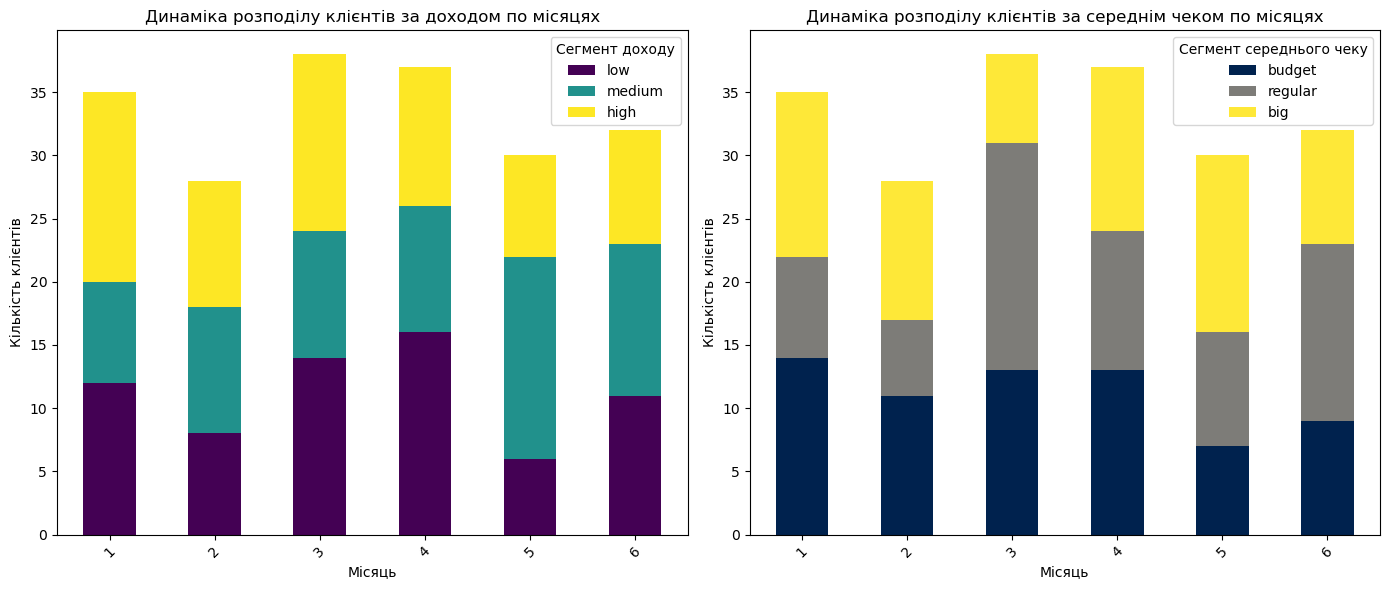

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Графік 1: Динаміка сегментів по сумарному доходу
income_segment_trend = df.groupby('date_month')['income_segment'].value_counts().unstack()
income_segment_trend.plot(kind='bar', stacked=True, colormap='viridis', ax=ax[0])

ax[0].set_title('Динаміка розподілу клієнтів за доходом по місяцях')
ax[0].set_xlabel('Місяць')
ax[0].set_ylabel('Кількість клієнтів')
ax[0].set_xticklabels(income_segment_trend.index, rotation=45)
ax[0].legend(title='Сегмент доходу')

# Графік 2: Динаміка сегментів середнього чеку
bill_segment_size = df.groupby('date_month')['bill_segment'].value_counts().unstack()
bill_segment_size.plot(kind='bar', stacked=True, colormap='cividis', ax=ax[1])

ax[1].set_title('Динаміка розподілу клієнтів за середнім чеком по місяцях')
ax[1].set_xlabel('Місяць')
ax[1].set_ylabel('Кількість клієнтів')
ax[1].set_xticklabels(bill_segment_size.index, rotation=45)
ax[1].legend(title='Сегмент середнього чеку')

plt.tight_layout();

#### 3. Визначимо частоту відвідування клієнтів і поділимо на активні/середні/слабкі клієнти/не клієнти.

In [17]:
frequency_visits = df.groupby('customer_id')['trn_date'].count()

bins = [0, 2, 5, 10, float('inf')]  
labels = ['non-client', 'weak customers', 'medium customers', 'active customers']  

frequency_visits_category = pd.cut(frequency_visits, bins=bins, labels=labels, right=True)
frequency_visits_category

customer_id
101      weak customers
102      weak customers
103          non-client
104          non-client
105      weak customers
106    medium customers
107      weak customers
108          non-client
109      weak customers
110      weak customers
111          non-client
112    medium customers
113      weak customers
114    medium customers
115          non-client
116      weak customers
117      weak customers
118      weak customers
119          non-client
120      weak customers
121      weak customers
122      weak customers
123    medium customers
124    medium customers
125          non-client
126      weak customers
127      weak customers
128      weak customers
129          non-client
130    medium customers
131    medium customers
132    medium customers
133      weak customers
134      weak customers
135      weak customers
136      weak customers
137      weak customers
138      weak customers
139      weak customers
140      weak customers
141    medium customers
142 

### Аналіз сегментації клієнтів та рекомендації для бізнесу

1. Інсайти сегментації
Розподіл клієнтів за частотою відвідувань допомагає визначити рівень їхньої лояльності:
- Non-clients (0-2 відвідування) – потенційні клієнти, які ще не стали постійними.
- Weak customers (3-5 відвідувань) – нерегулярні клієнти, які можуть як активізуватися, так і зникнути.
- Medium customers (6-10 відвідувань) – середньоактивні клієнти, які вже мають певну звичку користуватися послугами.
- Active customers (10+ відвідувань) – найцінніші лояльні клієнти.

2. Маркетингові рекомендації
- Для активних клієнтів – підтримка лояльності через персоналізовані бонуси (наприклад, знижки на день народження).
- Для слабких клієнтів – спеціальні пропозиції, що мотивують частіше користуватися послугами.
- Для non-clients – welcome-бонуси або тестові пропозиції, які можуть зацікавити нових клієнтів.
- Аналіз прибутковості – важливо оцінювати не лише частоту відвідувань, а й середній чек у кожному сегменті. Якщо клієнт рідко відвідує та має низький чек, то, ймовірно, витрачати ресурси на його повернення неефективно.

3. Аналіз тенденцій для оптимізації витрат
Щоб розуміти ефективність стратегій залучення клієнтів, варто відстежувати такі показники:
- Скільки non-clients реально переходять у weak/medium/active?
- Який відтік у weak customers? Вони частіше йдуть у non-clients чи активізуються?
- Як змінюється середній чек у кожному сегменті з часом?

#### 4. Побудуємо матрицю переходів між сегментами та подивимся динаміку середнього чека. Це допоможе зрозуміти, які маркетингові заходи приносять найбільший ефект і на які групи клієнтів варто спрямовувати основні ресурси.

In [20]:
# Cтворюємо сегменти для кожного місяця
df['visit_frequency'] = df.groupby(['customer_id', 'date_month'])['trn_date'].transform('count')

df['segment'] = pd.cut(df['visit_frequency'], bins=[0, 2, 5, 10, float('inf')], 
                       labels=['non-client', 'weak customers', 'medium customers', 'active customers'])

# Будуємо матрицю переходів 
df['next_segment'] = df.groupby('customer_id')['segment'].shift(-1)

transition_matrix = pd.crosstab(df['segment'], df['next_segment'], normalize='index')
print(transition_matrix)

next_segment      non-client  weak customers  medium customers
segment                                                       
non-client          0.909091        0.082645          0.008264
weak customers      0.478261        0.521739          0.000000
medium customers    0.333333        0.000000          0.666667


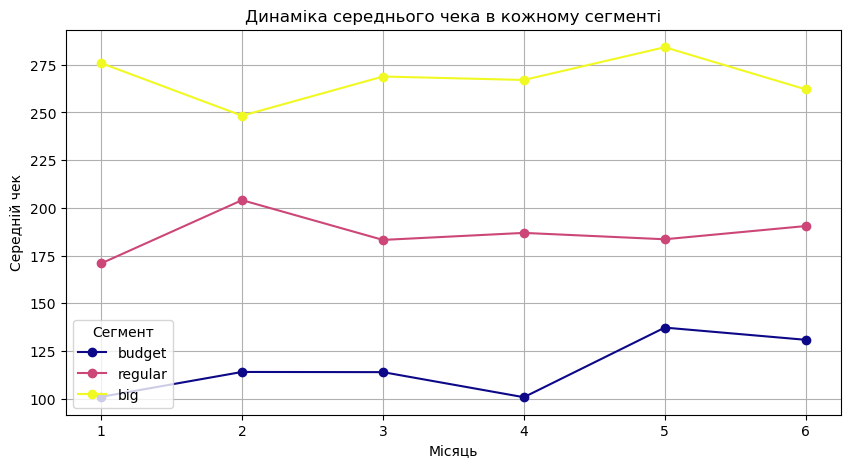

In [21]:
# Аналіз змін середнього чеку
avg_bill_trend = df.groupby(['date_month', 'bill_segment'])['avg_bill'].median().unstack()
avg_bill_trend.plot(kind='line', marker = 'o', figsize=(10, 5), colormap='plasma')
plt.title('Динаміка середнього чека в кожному сегменті')
plt.xlabel('Місяць')
plt.ylabel('Середній чек')
plt.legend(title='Сегмент', loc=3)
plt.grid();

#### 5. Знайдемо кількість унікальних днів покупок (Retention)

In [23]:
uniq_days_visit = df.groupby(['customer_id', 'date_month'])['trn_date'].nunique().reset_index()
uniq_days_visit.sort_values(by=['customer_id', 'date_month'], ascending=True)

,customer_id,date_month,trn_date
0,101,1,1
1,101,3,1
2,101,4,1
3,101,5,1
4,102,1,1
...,...,...,...
146,149,2,1
147,150,1,1
148,150,2,1
149,150,4,1


#### Шукаємо різницю між візитами відвідувачів

In [25]:
df = df.sort_values(by=['customer_id', 'trn_date'])

# Додаємо лаг (попередню дату для кожного кастомера)
df['prev_visit'] = df.groupby('customer_id')['trn_date'].shift(1)

# Рахуємо різницю в днях між поточною та попередньою датою
df['days_since_last_visit'] = (df['trn_date'] - df['prev_visit']).dt.days

df.head(6)

,trn_id,customer_id,location_id,trn_date,trn_income,trn_success,date_month,avg_bill,total_income,income_segment,bill_segment,visit_frequency,segment,next_segment,prev_visit,days_since_last_visit
70,1071,101,2,2023-01-18,104.27,1,1,104.27,104.27,low,budget,1,non-client,non-client,NaT,NaN
27,1028,101,6,2023-03-31,164.64,0,3,164.64,164.64,low,regular,1,non-client,non-client,2023-01-18,72.0
8,1009,101,1,2023-04-24,115.45,0,4,115.45,115.45,low,budget,1,non-client,non-client,2023-03-31,24.0
148,1149,101,3,2023-05-06,259.35,1,5,259.35,259.35,medium,big,1,non-client,NaN,2023-04-24,12.0
40,1041,102,7,2023-01-31,123.90,0,1,123.90,123.90,low,budget,1,non-client,non-client,NaT,NaN
116,1117,102,3,2023-02-27,289.40,0,2,289.40,289.40,medium,big,1,non-client,non-client,2023-01-31,27.0


In [26]:
df_filtered = df.dropna(subset=['days_since_last_visit'])

# Обчислюємо середню кількість днів між візитами для кожного місяця
avg_days_between_visits = df_filtered.groupby(['date_month', 'segment'])['days_since_last_visit'].mean().reset_index()

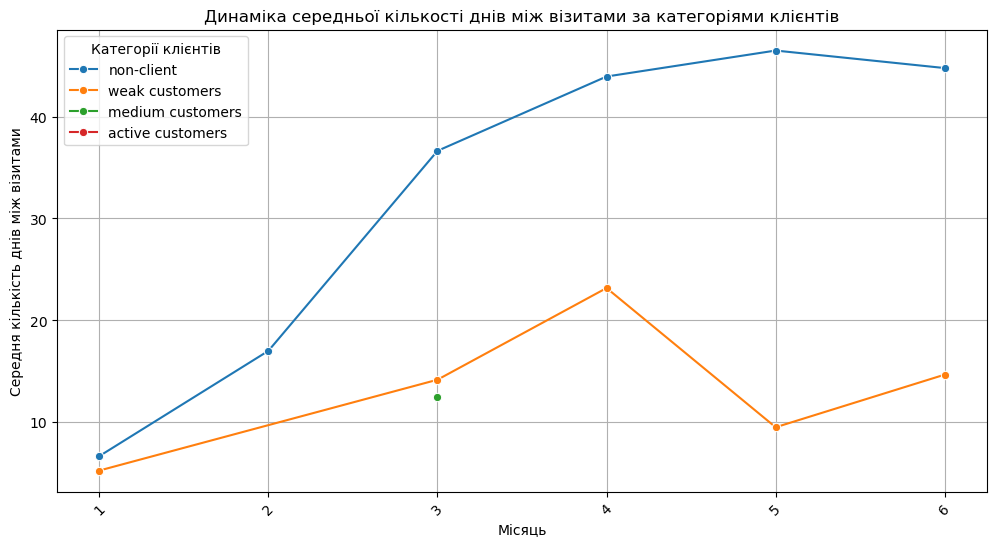

In [27]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=avg_days_between_visits, x='date_month', y='days_since_last_visit', hue='segment', marker='o')

plt.xlabel('Місяць')
plt.ylabel('Середня кількість днів між візитами')
plt.title('Динаміка середньої кількості днів між візитами за категоріями клієнтів')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Категорії клієнтів');

### Висновки щодо частоти візитів клієнтів
1. Частота візитів – важливий показник цінності клієнта.
 - Якщо клієнт приходить раз на місяць, його лояльність нижча, і він менш прибутковий для бізнесу.
 - Якщо клієнт заходить щотижня або частіше, він може бути постійним покупцем, що підвищує його Lifetime Value (LTV).

2. Аналіз середнього інтервалу між візитами:
 - Якщо days_since_last_visit великий – клієнт рідко повертається, можливо, потрібна додаткова мотивація (знижки, персоналізовані пропозиції).
 - Якщо різниця між візитами стабільно мала – цей клієнт постійний і може бути в групі найбільш цінних.


#### 6. Класифікуємо клієнтів на основі їх географії відвідування.
Це дасть розуміння про вподобання клієнтів.

In [30]:
# Групуємо за клієнтами і місцями, щоб побачити найбільш популярні місця для кожного клієнта
location_counts = df.groupby(['customer_id', 'location_id']).size().reset_index(name='visit_count')

# Знаходимо найбільш відвідувану локацію для кожного клієнта
most_visited_location = location_counts.loc[location_counts.groupby('customer_id')['visit_count'].idxmax()]

display(most_visited_location.head())  # Перші кілька клієнтів і їх популярні місця

,customer_id,location_id,visit_count
0,101,1,1
7,102,7,2
8,103,3,2
9,104,3,2
11,105,5,2


In [31]:
# Визначаємо групи клієнтів за кількістю візитів
visit_threshold = df.groupby('customer_id')['location_id'].count().reset_index(name='visit_count')

# Класифікуємо клієнтів за кількістю візитів
visit_threshold['customer_value'] = pd.cut(visit_threshold['visit_count'], 
                                           bins=[0, 5, 15, 50, 1000], labels=['Low', 'Medium', 'High', 'Top'])

display(visit_threshold.head()) 

,customer_id,visit_count,customer_value
0,101,4,Low
1,102,5,Low
2,103,2,Low
3,104,2,Low
4,105,5,Low


### Висновок:

Оскільки в даних відсутній опис локацій, для повноцінного аналізу можна доповнити дані запитом до бази, щоб отримати інформацію про типи закладів, які відвідують клієнти. Це дозволить глибше зрозуміти переваги клієнтів щодо типу закладів чи кухні, що вони обирають, і допоможе більш точно сегментувати клієнтів за їх уподобаннями. Такий підхід дозволить покращити персоналізацію маркетингових стратегій, враховуючи різні інтереси та потреби клієнтів.

Але наш поділ клієнтів за кількістю візитів дає змогу виділити найцінніших клієнтів для бізнесу:
- Активні клієнти — це ті, хто регулярно відвідує певні локації або типи закладів. Вони є найбільш лояльними і вже мають певну звичку відвідувати заклади.
- Менш активні клієнти — ці клієнти відвідують заклади рідше, але вони все одно регулярно користуються послугами, що робить їх потенційно цінними для бізнесу.
- Потенційно цінні клієнти — клієнти, які відвідують різні заклади, але менш часто, або мають інтереси, які можна розвивати через спеціальні акції чи маркетингові стратегії.

### Рекомендації для бізнесу:
1. Покращення персоналізації маркетингових акцій: Використовувати дані про типи закладів і локації для створення спеціальних пропозицій для різних сегментів клієнтів. Наприклад, для активних клієнтів можна запровадити програми лояльності або персоналізовані знижки на їх улюблені заклади. Для менш активних клієнтів — пропонувати спеціальні акції або знижки для стимулювання їх відвідувань.
2.	Активні клієнти: Враховуючи високий рівень їхньої лояльності, варто запровадити програми лояльності, такі як бонусні бали або ексклюзивні пропозиції для них. Це допоможе утримати їх увагу та залучити до нових закладів.
3.	Менш активні клієнти: Для таких клієнтів можна проводити таргетовані кампанії, спрямовані на заохочення їх до частіших відвідувань. Наприклад, пропонувати промо-акції, які стимулюють повторні візити, або організовувати заходи для привернення їхньої уваги.
4.	Потенційно цінні клієнти: Для таких клієнтів корисно розробити кампанії, які б дозволили збільшити їхню залученість. Наприклад, надавати спеціальні пропозиції для відвідування нових типів закладів чи кухонь, які ще не є для них звичними, або запропонувати бонуси за спробу нових послуг.
5.	Аналіз типів закладів і кухні: Враховуючи, що клієнти мають різні переваги щодо типу закладів, бізнесу варто інвестувати в розуміння цих переваг для створення ефективних маркетингових стратегій. Це дозволить краще налаштувати рекламу та спеціальні пропозиції, які будуть відповісти на потреби кожного сегмента клієнтів.

Загалом, такий підхід допоможе бізнесу оптимізувати маркетингові кампанії, підвищити лояльність клієнтів і збільшити їхню активність через таргетовані пропозиції.